### IMPORTS

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

import matplotlib.pyplot as plt

### LOADING DATA

In [2]:
DATA = pd.read_csv("loan_data.csv")

In [3]:
DATA.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### MISSING VALUES

In [4]:
DATA.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
DATA['Gender'].fillna(DATA['Gender'].mode()[0], inplace=True)
DATA['Married'].fillna(DATA['Married'].mode()[0], inplace=True)
DATA['Dependents'].fillna(DATA['Dependents'].mode()[0], inplace=True)
DATA['Self_Employed'].fillna(DATA['Self_Employed'].mode()[0], inplace=True)
DATA['Loan_Amount_Term'].fillna(DATA['Loan_Amount_Term'].mode()[0], inplace=True)
DATA['Credit_History'].fillna(DATA['Credit_History'].mode()[0], inplace=True)

In [6]:
DATA['LoanAmount'].fillna(DATA['LoanAmount'].mean(), inplace=True)

In [7]:
DATA.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### LABEL ENCODING

In [8]:
DATA['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
DATA['Loan_Status'] = DATA['Loan_Status'].map({'Y': 1, 'N': 0})

##### Dependents and Educaion are Ordinal variables 

In [10]:
DATA['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
DATA['Dependents'] = DATA['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

In [12]:
DATA['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
DATA['Education'] = DATA['Education'].map({'Graduate': 1, 'Not Graduate': 0})

### ONE HOT ENCODING

In [14]:
DATA = pd.concat([pd.get_dummies(DATA[['Gender', 'Married', 'Self_Employed', 'Property_Area']]), DATA], axis = 1)

In [15]:
DATA = DATA.drop(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Property_Area'], axis = 1)

### TRAIN / TEST SPLIT

In [16]:
X = DATA.drop('Loan_Status', axis = 1)

In [17]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)

In [18]:
y = DATA['Loan_Status']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=DATA['Loan_Status'], random_state=10, test_size=0.2)

### MODEL

In [20]:
model = Sequential()
model.add(InputLayer(input_shape=(X.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 2s 100ms/step - loss: 0.6823 - accuracy: 0.5956 - val_loss: 0.6443 - val_accuracy: 0.6829
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6315 - accuracy: 0.6896 - val_loss: 0.6165 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6799 - val_loss: 0.6013 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5916 - accuracy: 0.6982 - val_loss: 0.5888 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7159 - val_loss: 0.5751 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5646 - accuracy: 0.6984 - val_loss: 0.5610 - val_accuracy: 0.7154
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.7105 - val_loss: 0.5449 - val_accuracy: 0.7480
Epoch 8/50
16/16 [

### PLOTS

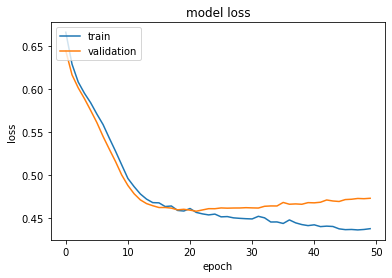

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

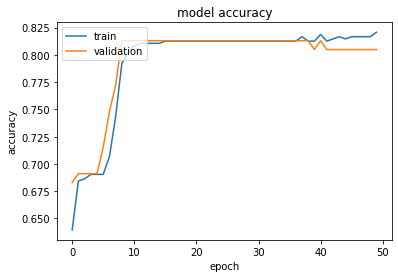

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()